## MACHINE LEARNING PROJECT: MOBILE PHONE PRICE PREDICTION

You can reach the data set from link https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [1]:
# The libraries & modules which we are going to use in our study:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# First of all, we load our data as a csv file:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

## Explore the dataset

Let's explore our dataset. 

In [3]:
#Inspecting the training Dataset
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#Inspecting the Test Dataset
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


Here is the attributes of our dataset: <br>
- __id__: ID <br>
- __battery_power__: Total energy a battery can store in one time measured in mAh<br> 
- __blue__: Has bluetooth or not<br> 
- __clock_speed__: speed at which microprocessor executes instructions<br> 
- __dual_sim__: Has dual sim support or not<br> 
- __fc__: Front Camera mega pixels<br> 
- __four_g__: Has 4G or not<br> 
- __int_memory__: Internal Memory in Gigabytes<br> 
- __m_dep__: Mobile Depth in cm<br> 
- __mobile_wt__: Weight of mobile phone<br> 
- __n_cores__: Number of cores of processor<br> 
- __pc__: Primary Camera mega pixels<br> 
- __px_height__: Pixel Resolution Height<br> 
- __px_width__: Pixel Resolution Width<br> 
- __ram__: Random Access Memory in Megabytes<br> 
- __sc_h__: Screen Height of mobile in cm<br> 
- __sc_w__: Screen Width of mobile in cm<br> 
- __talk_time__: longest time that a single battery charge will last when you are<br> 
- __three_g__: Has 3G or not<br> 
- __touch_screen__: Has touch screen or not<br> 
- __wifi__: Has wifi or not<br> 
- __price_range__: This is the target variable with value of __0 (low cost)__, __1 (medium cost)__, __2 (high cost)__ and __3 (very high cost)__

## Data Preprocessing

In [5]:
#Display information about our dataset
print("------------>Information about the Dataset<------------")
print()
data.info()

------------>Information about the Dataset<------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  


In [6]:
#Checking the missing values in our dataset if any
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

We do not have any null values in our dataset. It will ease the preprocessing step. 

In [7]:
#Summary statistics of the training dataset
descrip=data.describe()  
#Summary statistics of the test dataset
descrip_test=test_data.describe()  
print("------------>Decription of the Training Data<------------")
print()
pd.DataFrame(data = descrip)

------------>Decription of the Training Data<------------



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
print("------------>Decription of the Testing Data<------------")
print()
pd.DataFrame(data = descrip_test)

------------>Decription of the Testing Data<------------



,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


As mentioned above, our data have labels and we will apply supervised learning algorithms.
We define our target column as "y" and rest of the data which are used as inputs as "x".

In [9]:
y = data['price_range']
x = data.drop('price_range', axis = 1)
y.unique()
# We have four price ranges as target values and will do multi-class classification in our study. 

array([1, 2, 3, 0], dtype=int64)

Let's see our dataset is balanced or imbalanced?

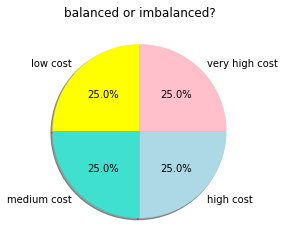

In [10]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = data['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('balanced or imbalanced?')
plt.show()
#dataset is balanced

We split our dataset into 'training' and 'validation' datasets. And, we are going to see our models' accuracy by applying them on validation dataset.  

In [11]:
#Splitting of data
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify = y)

In [12]:
# check whether the split works correctly 
print(x_train.shape)
print(x_valid.shape)

(1600, 20)
(400, 20)


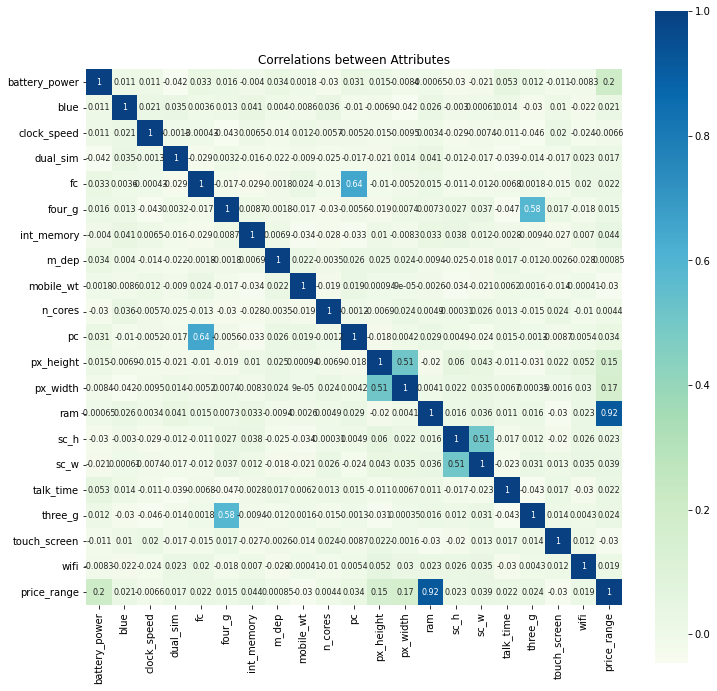

In [13]:
# Before going through machine learning applications, let's see the correlation btw features and target variable by plotting heatmap:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

We see from the heatmap;
- the most influential variable is ram
- most of the variables have very little correlation to price range
- primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect prige range.
- having 3G and 4G is somewhat correlated
- there is no highly correlated inputs in our dataset, so there is no multicollinearity problem.

#### Here, we can see that the following have high correlation with each other

1. pc and fc
2. three_g and four_g
3. px_width and px_height

------------>Outlier Analysis of Non-Categorical Data<------------



<AxesSubplot:xlabel='talk_time'>

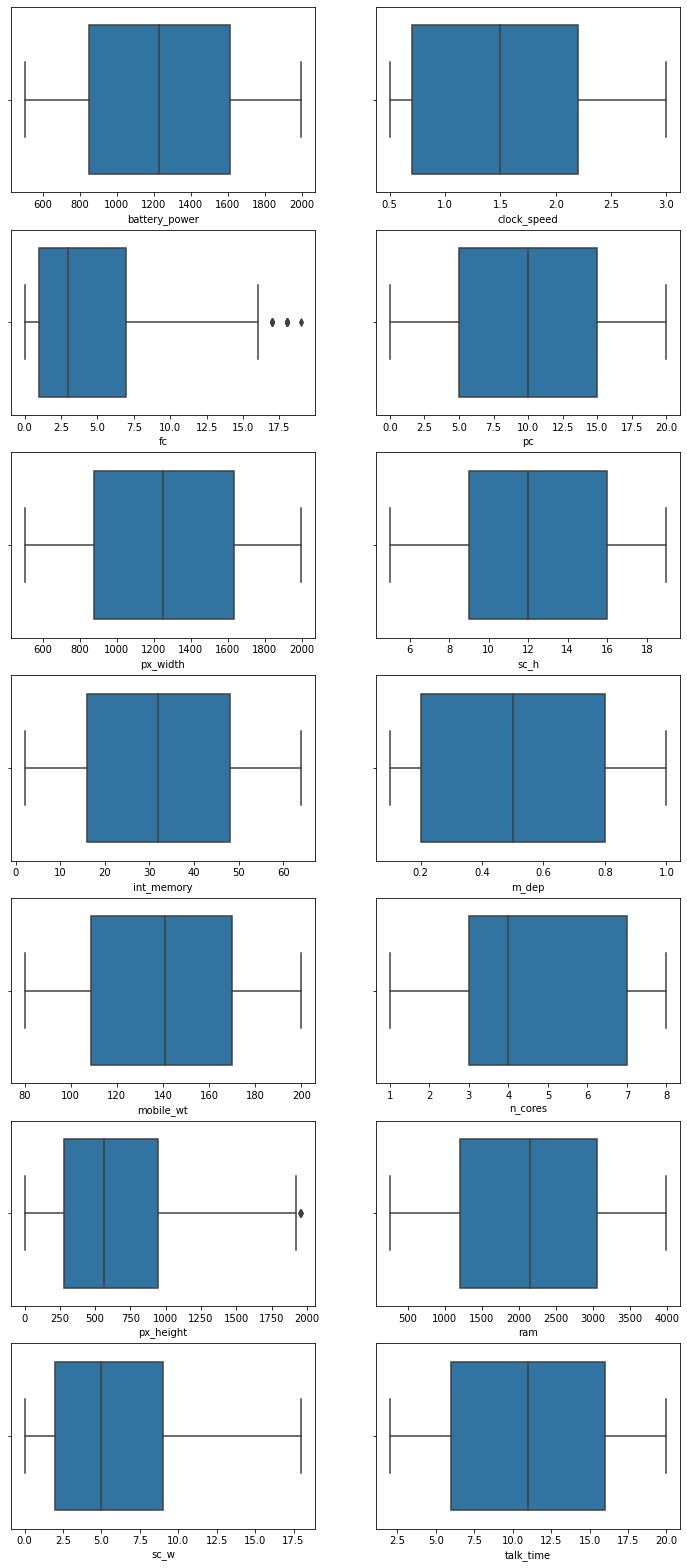

In [14]:
print("------------>Outlier Analysis of Non-Categorical Data<------------")
print()
fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12,28))
sns.boxplot(x=data['battery_power'],ax=ax[0,0])
sns.boxplot(x=data['clock_speed'],ax=ax[0,1])
sns.boxplot(x=data['fc'],ax=ax[1,0])
sns.boxplot(x=data['pc'],ax=ax[1,1])
sns.boxplot(x=data['px_width'],ax=ax[2,0])
sns.boxplot(x=data['sc_h'],ax=ax[2,1])
sns.boxplot(x=data['int_memory'],ax=ax[3,0])
sns.boxplot(x=data['m_dep'],ax=ax[3,1])
sns.boxplot(x=data['mobile_wt'],ax=ax[4,0])
sns.boxplot(x=data['n_cores'],ax=ax[4,1])
sns.boxplot(x=data['px_height'],ax=ax[5,0])
sns.boxplot(x=data['ram'],ax=ax[5,1])
sns.boxplot(x=data['sc_w'],ax=ax[6,0])
sns.boxplot(x=data['talk_time'],ax=ax[6,1])

#### There are a few outliers in fc and px_height only.

Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

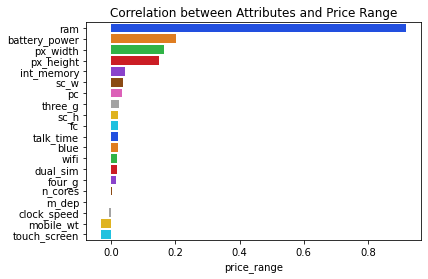

In [15]:
#we are not considering the correlations between X features among themselves
corr = data.corr()
corr = corr.price_range
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation between Attributes and Price Range")

------------>Analysis of Attributes<------------



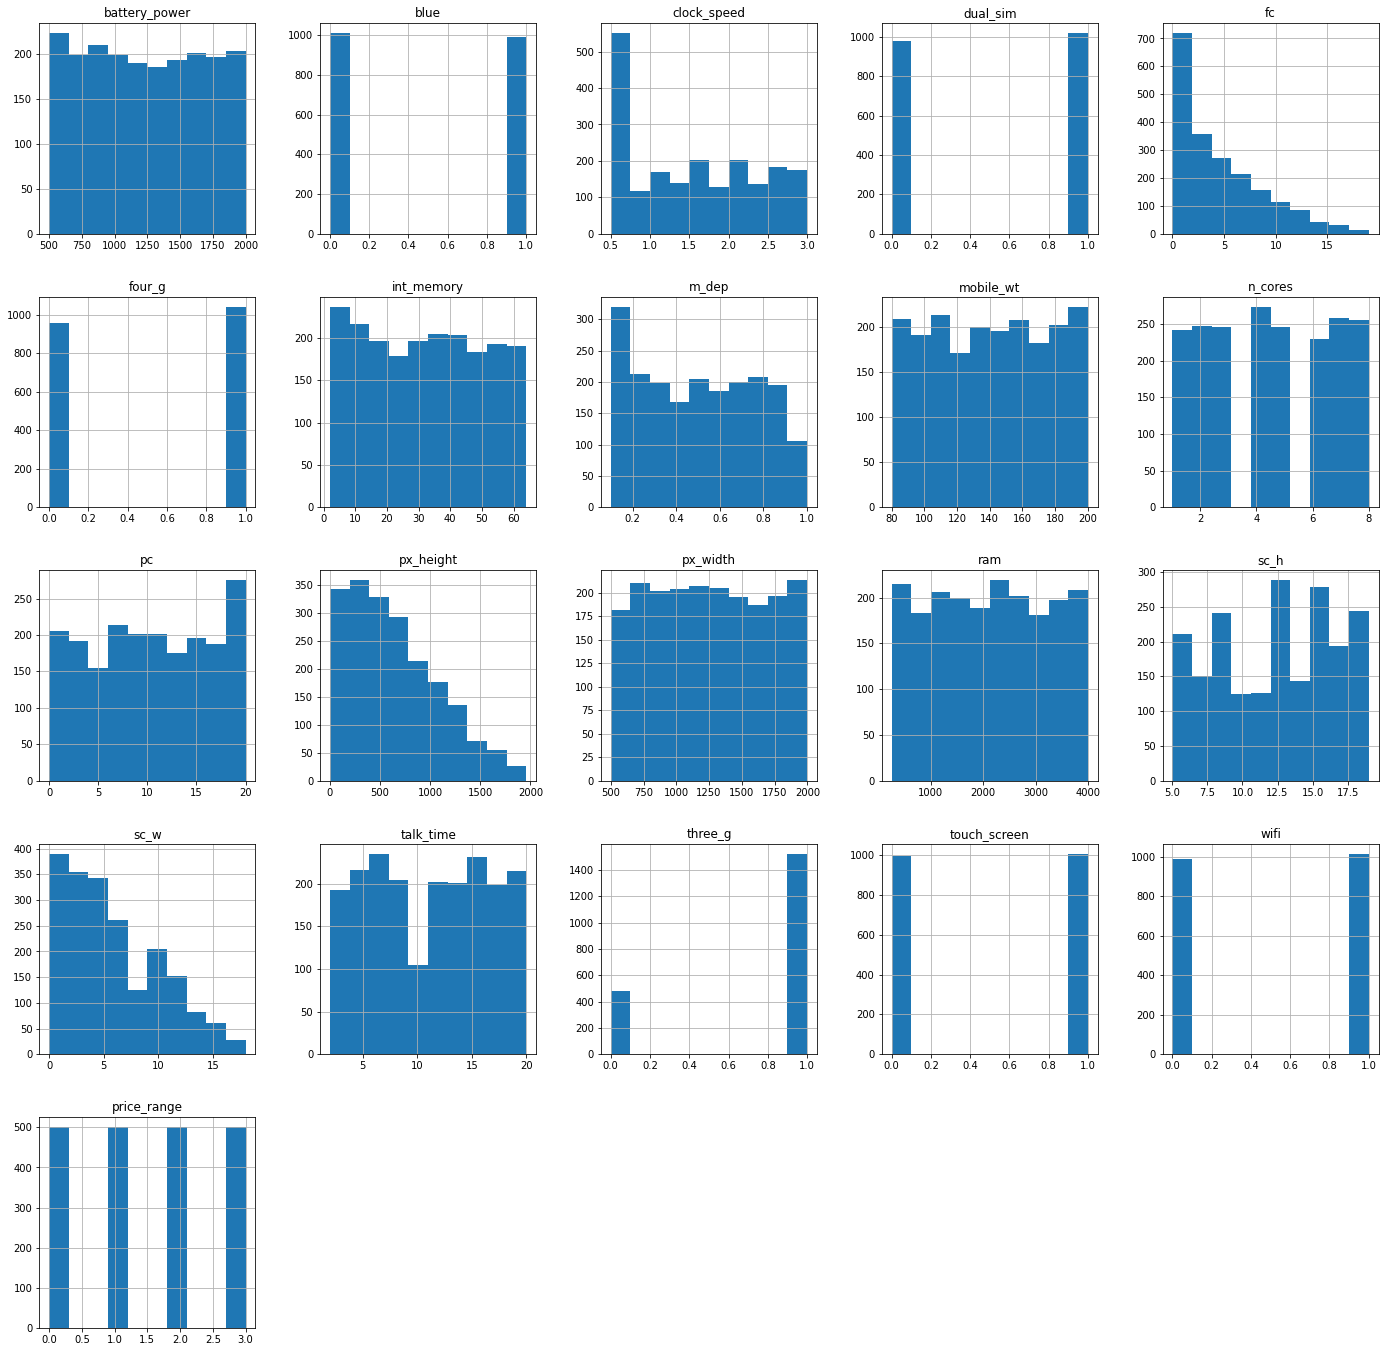

In [16]:
#data visualization drawing histogram
print("------------>Analysis of Attributes<------------")
print()
data.hist(sharex=False, sharey=False, figsize=(24,24) )
plt.show()

## Implementation of ML Algorithms

To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and validation dataset. After that, we are going to choose the best model for our data set and create target values for test dataset.
- Random forest
- KNN

### Random Forest

Random forest is a type of ensemble method of machine learning. It deals with overfitting problem and increase accuracy compared to a simple decision tree model.

In [17]:
rf = RandomForestClassifier(n_estimators = 100, random_state=101, criterion = 'entropy', oob_score = True) 
model_rf = rf.fit(x_train, y_train)

In [18]:
y_pred_rf = rf.predict(x_valid) 

In [19]:
print(metrics.confusion_matrix(y_valid, y_pred_rf)) 

[[91  9  0  0]
 [ 3 91  6  0]
 [ 0  7 85  8]
 [ 0  0  6 94]]


In [20]:
# Create confusion matrix
pd.crosstab(y_valid, y_pred_rf, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,0,1,2,3
Actual Class,,,,
0,91,9,0,0
1,3,91,6,0
2,0,7,85,8
3,0,0,6,94


In [21]:
acc_rf = metrics.accuracy_score(y_valid, y_pred_rf)
acc_rf

0.9025

### K-Nearest Neighbors (KNN)

'K' is the number of nearest training points which we classify them using the majority vote.

Let's find the optimum 'k' value via Grid Search method and run knn model with this 'k'.

In [22]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv=5)
model.fit(x_train, y_train)
model.best_params_

{'n_neighbors': 9}

After finding optimum k number, we run our model again with k=9.

In [23]:
model_knn = KNeighborsClassifier(n_neighbors=9)  
model_knn.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=9)

In [24]:
y_pred_knn = model_knn.predict(x_valid) 

In [25]:
print(metrics.confusion_matrix(y_valid, y_pred_knn)) 

[[95  5  0  0]
 [ 2 96  2  0]
 [ 0  3 94  3]
 [ 0  0  6 94]]


In [26]:
acc_knn = accuracy_score(y_valid, y_pred_knn)
acc_knn

0.9475

## Conclusion

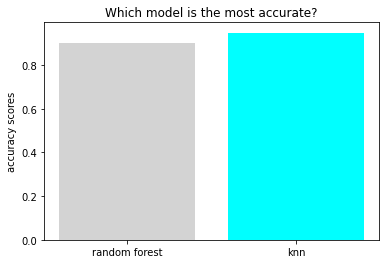

In [27]:
models = ['random forest', 'knn']
acc_scores = [ 0.9025, 0.9475]

plt.bar(models, acc_scores, color=['lightgrey', 'cyan'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

After training our dataset with two different model, we conclude that KNN is best model for our dataset. (via the highest accuracy score = 0.9475) <br>
Finally, we can run our KNN model to predict target values on the test dataset and add labels to dataset. 

In [28]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [29]:
# We did not have 'id' column in the traning and validation datasets, so, we delete it from test dataset to make the dimension of input dataset same.
test_data=test_data.drop('id',axis=1)

In [30]:
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [31]:
predicted_price_range = model_knn.predict(test_data) 

In [32]:
# We are able to forecast test dataset labels:
predicted_price_range

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [33]:
test_data['price_range'] = predicted_price_range

In [34]:
test_data.head(1000)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


We have achieved our goal and predicted price ranges for mobile phones in our new dataset.

In [35]:
test_data = pd.read_csv("test.csv")
test_data['price_range'] = predicted_price_range
final = pd.DataFrame({'Id': test_data['id'], 'Price Range': test_data['price_range']})
final.to_csv('final.csv')